In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [5]:
gold_data = pd.read_csv('gld_price_data.csv')
gold_data.info

<bound method DataFrame.info of            Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]>

In [6]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

#### Plotting correlation among features.

/tmp/ipykernel_20637/3109331548.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(gold_data.corr(), square = True, fmt='.1f', annot=True, annot_kws={'size': 10}, cmap='Greens')


<AxesSubplot: >

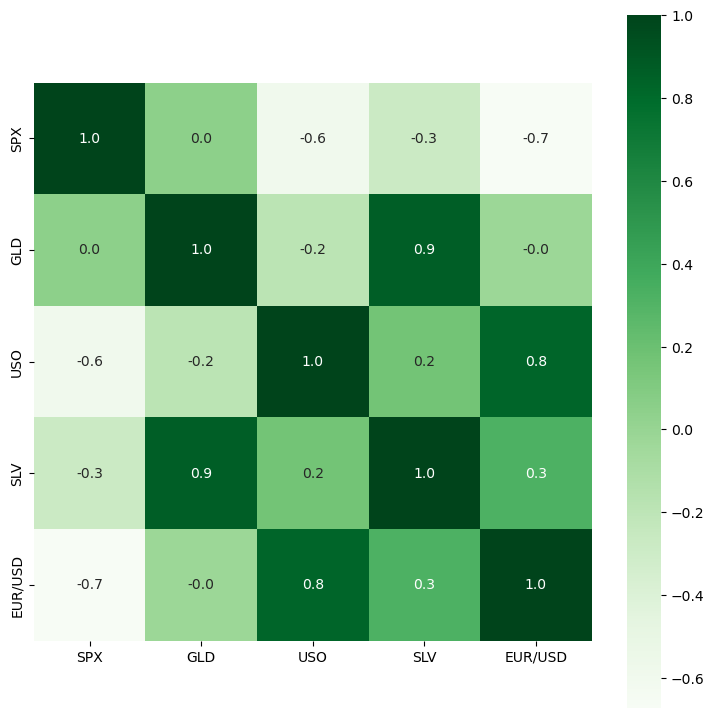

In [32]:
plt.figure(figsize = (9,9))
sns.heatmap(gold_data.corr(), square = True, fmt='.1f', annot=True, annot_kws={'size': 10}, cmap='Greens')

#### Gold and silver prices are correlated to each other while gold and us oil aren't correlated.

#### Plotting price occurences of gold.

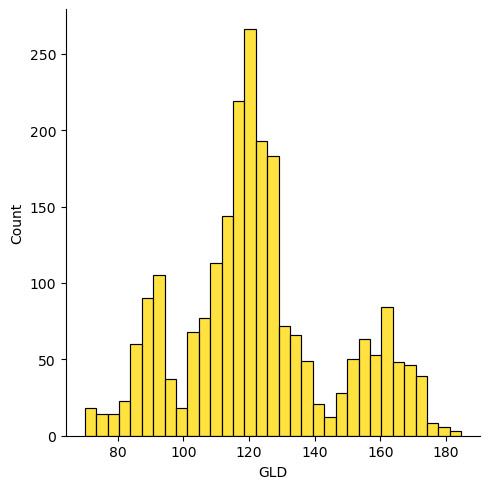

In [34]:
sns.displot(gold_data['GLD'], color = 'gold')

#### Splitting dataset.

In [35]:
x = gold_data.drop(['Date', 'GLD'], axis = 1)
y = gold_data['GLD']

In [36]:
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [37]:
y.values

array([ 84.860001,  85.57    ,  85.129997, ..., 125.18    , 124.489998,
       122.5438  ])

In [38]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

In [41]:
gold_data.shape

(2290, 6)

In [42]:
print(0.8 * 2290)

1832.0


In [39]:
xtrain.shape

(1832, 4)

In [40]:
ytrain.shape

(1832,)

In [45]:
xtest.shape

(458, 4)

In [46]:
ytest.shape

(458,)

In [62]:
reg = RandomForestRegressor(n_estimators = 10000)

In [63]:
reg.fit(xtrain, ytrain)

RandomForestRegressor(n_estimators=10000)

In [64]:
predict = reg.predict(xtest)

In [67]:
r2 = metrics.r2_score(ytest, predict)
print(f"{round(r2, 4) * 100} % is the accuracy of the random forest regressor according to the R2 score." )

98.34 % is the accuracy of the random forest regressor according to the R2 score.


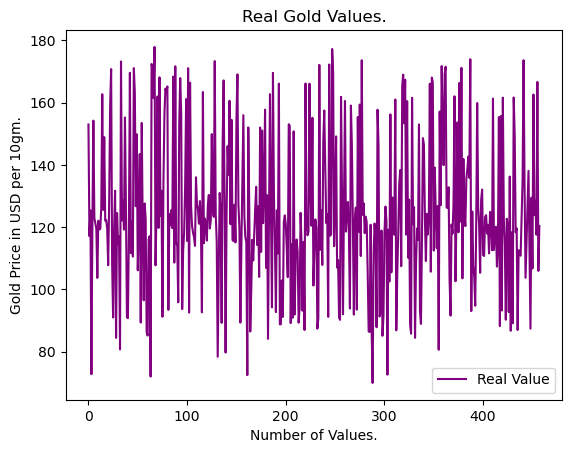

In [83]:
plt.plot(list(ytest), color = 'purple', label = 'Real Value')
plt.title('Real Gold Values.')
plt.xlabel('Number of Values.')
plt.ylabel('Gold Price in USD per 10gm.')
plt.legend()
plt.show()

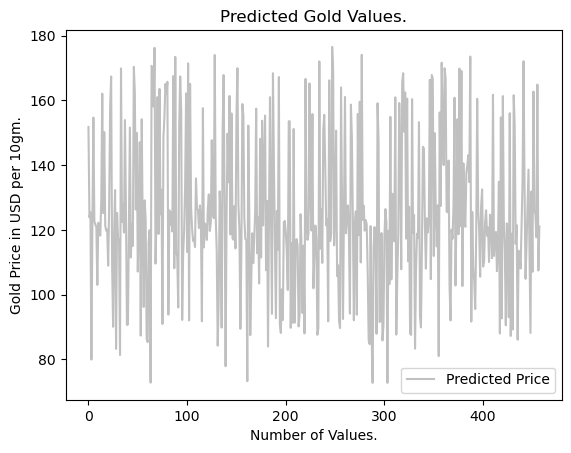

In [82]:
plt.plot(predict, color = 'silver', label = 'Predicted Price')
plt.title('Predicted Gold Values.')
plt.xlabel('Number of Values.')
plt.ylabel('Gold Price in USD per 10gm.')
plt.legend()
plt.show()

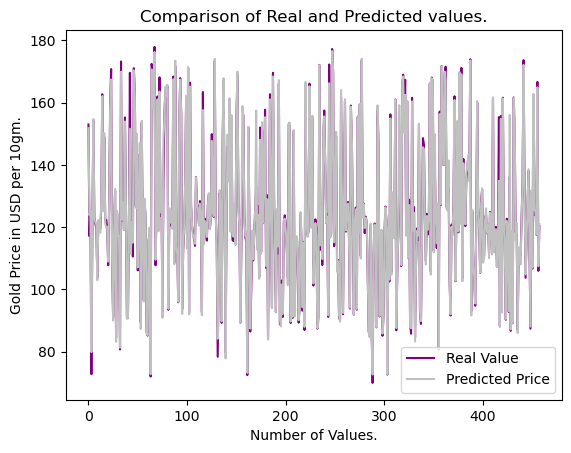

In [76]:
plt.plot(list(ytest), color = 'purple', label = 'Real Value')
plt.plot(predict, color = 'silver', label = 'Predicted Price')
plt.title('Comparison of Real and Predicted values.')
plt.xlabel('Number of Values.')
plt.ylabel('Gold Price in USD per 10gm.')
plt.legend()
plt.show()